In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lec_act_4_fitting.ipynb")

# Fit a line to the middle part of the finger 1 motor positions

It might be helpful to look at the instruction/background slides before tackling this

https://docs.google.com/presentation/d/1IoiD43zjp_XOEH0soCZGMBN4b13KWVndoHAxoUJMQoM/edit?usp=sharing

Lecture goals:
- Extract a subset of data based on conditions
- Use linregress to approximate linear data

In [33]:
# Doing the imports for you
import numpy as np
import json as json
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Read the motor position data in
The motor position data has already been cut out and put in separate .csv files for you (see Lecture script, slides). 

TODO: Read the data in using numpy's loadtxt.

The shape of the data should be (355, 40) and (305, 40)

In [34]:

# TODO Read in Motor position f1_success and failed .csv files
data_successful = np.loadtxt("Data/Motor position f1_successful.csv", dtype=float, delimiter=',')  # Motor position f1_successful.csv
data_failed = np.loadtxt("Data/Motor position f1_failed.csv", dtype=float, delimiter=',') # Motor position f1_failed.csv



In [35]:
grader.check("Read data")

Read data results: All test cases passed!

# Fit a line to the middle points

Doing this as a function so you can use it twice.

Some decisions:
- Pass in the data as two arrays, the t and y values
-    Use fit_line_to_middle_biot function to pull out the "middle" bit
- Returns the points of intersection with the min/max values (rather than slope and intercept) because in the long run that's what we care about (where the motor started and stopped)
- The eps is a "fudge factor" so that you can clip out data above/below a threshhold

How to do this:
- Clip with a fudge factor, use np.logical_and fudge factor should be d_y = eps * (y_max - y_min), 
   take all points y_min + d_y < y < y_max - dy
- Use np.where to find the first index where y > y_min + d_y (or < y_max - d_y)
    np.where returns a tuple of arrays; use index[0][0] to get the value out
       - index[0] gets the array out of the tuple, index[0][0] gets the first element of the array
    Then use start:end to get the values out of ts, ys

Alternative "fancy" approach (requires use of logical and):
- Get a boolean array with true where y > y_min + d_y AND y < y_max - d_y
- Use the boolean array to index the ts and the ys


In [6]:
# EXAMPLE CODE
#  Using np.where to find an index in another array
#  Using np.logical_and to get "this and that"

n_data_pts = 10
# t values
ts = np.linspace(0, np.pi * 2, n_data_pts)
# Cosine - is negative in the middle
ys = np.cos(ts)

# Find the y values that are between -0.1 and -1.0 - ok, we know cosine values don't go below -1, but this is just an example...
b_is_below_first_value = ys < -0.1     # first condition
b_is_above_second_value = ys >= -1.0   # second condition
b_is_both = np.logical_and(b_is_below_first_value, b_is_above_second_value)  # Is true only for middle points (check in variable window)
res_where = np.where(b_is_both)

# Remember that res_where is a tuple - get the first element of the tuple (the indices)
res_where_indices = res_where[0]

# Now get the *first* index where the condition is true
first_index = res_where_indices[0]

# Now get the corresponding t value
first_t = ts[first_index]

# Note that for the function you'll do a linear regression and use the slope to find the corresponding t value

print(f"Found first value {ys[first_index]} at index {first_index}, t value {first_t}")

Found first value -0.4999999999999998 at index 3, t value 2.0943951023931953


In [36]:
# SCRATCH CELL
# Write the code here before putting it in the function

# This bit of code will test your function with known values - should print out ((0.25, 0.0), (0.75, 1.0))
# The index slice to use is 3:6 (the y values 0.25, 0.5, 0.75  and t values of 0.375, 0.5, 0.625)
#   Check the indices you get back from np.where - should select the three values that are NOT 0 or 1
# Slope is 2.0, intercept is -0.5
xs = np.linspace(0, 1, 9)
ys = np.array([0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1])

y_min = np.min(ys)
print(y_min)    
lg_test = np.logical_and(ys == y_min, ys )
print(lg_test)
print(np.where(lg_test))    

print(f"X values are {xs}")
print(f"Y values are {ys}")

# Get the min and max of the ys array
# Find the indices you want to fit to using np.where
# Do the linear regression with just those data points
# Use the y = mx + b equation to find the x value given y is the min (or the max)
#   Note: Use y=max and solve for x

# Should print out ((0.25, 0.0), (0.75, 1.0))


0.0
[False False False False False False False False False]
(array([], dtype=int64),)
X values are [0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]
Y values are [0.   0.   0.   0.25 0.5  0.75 1.   1.   1.  ]


In [78]:
def fit_line_to_middle_bit(ts, ys, eps=1e-2):
    """ Fit a line to the sloped middle bit of the data
      Return the line as a pair of points, one where the fitted line crosses the y min value, one where the line crosses
      the y max value (see slides for picture)
      Reminder: Use logical_and to do the and of two boolean conditions
    @param ts - the time values for the data (x-axis)
    @param ys - the function values (y-axis)
    @param eps - a fudge factor for clipping the middle bit (min + eps and max - eps)
    @returns (x_min, y_min), (x_max, y_max)  (two tuples)"""


    # TODO: 
    #.  Get y min and y max from the data
    #.  Use np.where to find the indices of the points that are between
    #.    ymin + eps * (ymax - ymin) and ymax - eps * (ymax - ymin)
    #   Get out just the data between those two indices (remember that 3:5 gets items 3 and 4, but not 5, use 3:6 to get 3,4,5)
    #.  Do a linear regression on just that data
    #.  Use the fitted line to get out the corresponding x values for y max and y min
    #.   x = (y - intercept) / slope
    #  Note: Use y_max and y_min, not the y values from the array, to find the x values


    y_min = np.min(ys)
    y_max = np.max(ys)
    indices = np.where(np.logical_and(ys > y_min + eps * (y_max - y_min), ys < y_max - eps * (y_max - y_min)))   
    good_data = ts[indices[0]]
    
   
    slope, intercept, r, p, se = linregress(good_data, ys[indices[0]])
    x_min = (y_min - intercept) / slope
    x_max = (y_max - intercept) / slope



    
    return (x_min, y_min), (x_max, y_max)


In [79]:
# Now call the function with the test values we set up in the scratch cell
fit_line_to_middle_bit(xs, ys, eps=0.1)
# Should print out ((0.25, 0.0), (0.75, 1.0))
#    ymin is zero, ymax is 1, the bit to use goes from 0.25 to 0.75
print(f"{fit_line_to_middle_bit(xs, ys, eps=0.1)}")



((0.25, 0.0), (0.75, 1.0))


## Use the function on each data set
Call the function twice, once with one row from the successful pick data, once with one row from the unsuccessful.

TODO
- Create t values as you did the previous weeks (time step is 1/30th of a second, make one t value for each y value, starting at 0)
- Call the **fit_line_to_middle_bits** function twice, once for the first row of the successful data, once for the first row of the failed data

Check - if you've done this correctly, for the first row of the successful data this should be around 8 and 12

Check - after fitting, Slope should be 654.xxx, intercept 162.xxx for first row (successful data)


In [80]:
grader.check("Fit middle")

Fit middle results: All test cases passed!

In [47]:
print(data_successful.shape)


(355, 40)


In [81]:

# Create t values with appropriate step size
time_step = 1.0/30.0   
n_time_steps = data_successful.shape[1]
print(n_time_steps) 
ts = np.arange(0,n_time_steps*time_step,step=time_step)
print(ts.shape)
pt_start_successful, pt_end_successful = fit_line_to_middle_bit(ts, data_successful[1,:], eps=0.001)    
pt_start_failed, pt_end_failed = fit_line_to_middle_bit(ts, data_failed[0,:], eps=0.001)
# END PROMPT"""

print(f"Last time step {ts[-1]}")
print(f"Successful: {pt_start_successful} {pt_end_successful}")
print(f"Failed: {pt_start_failed} {pt_end_failed}")

40
(40,)
Last time step 1.3
Successful: (0.2167542329740112, 299.9920044) (0.4154073963556108, 429.7919922)
Failed: (0.21114256844508902, 299.9920044) (0.41011735361937446, 429.7919922)


In [82]:
grader.check("data_for_each")

data_for_each results: All test cases passed!

# Plot the results

Plot the successful data on the left, the failed on the right.

For each plot, plot the data, the fitted line, and red X's for the start/stop end points of the line (see slides)

For the title: Round the number in the title to two digits

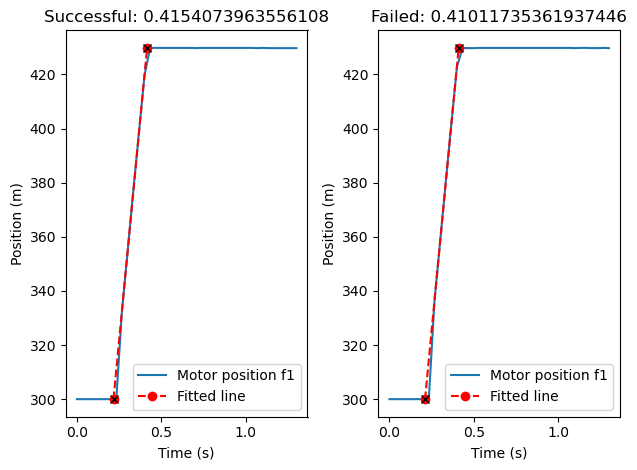

In [83]:
n_rows = 1
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols)


# Create t values with appropriate step size
ts = ts
# TODO Plot original data and fitted line (see slides)
#  TODO: Put the end time value in the title
# END PROMPT"""

axs[0].plot(ts, data_successful[1,:])       
axs[0].plot([pt_start_successful[0], pt_end_successful[0]], [pt_start_successful[1], pt_end_successful[1]], 'ro--') 
axs[0].plot([pt_start_successful[0], pt_end_successful[0]], [pt_start_successful[1], pt_end_successful[1]], 'kx') 
axs[0].set_title(f"Successful: {pt_end_successful[0]}")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Position (m)")
axs[0].legend(["Motor position f1", "Fitted line"])
axs[1].plot(ts, data_failed[0,:])
axs[1].plot([pt_start_failed[0], pt_end_failed[0]], [pt_start_failed[1], pt_end_failed[1]], 'ro--')
axs[1].plot([pt_start_failed[0], pt_end_failed[0]], [pt_start_failed[1], pt_end_failed[1]], 'kx')
axs[1].set_title(f"Failed: {pt_end_failed[0]}")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Position (m)")
axs[1].legend(["Motor position f1", "Fitted line"])


plt.tight_layout()


In [84]:
grader.check("Plot")

Plot results: All test cases passed!

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [ ]:

# List of names (creates a set)
worked_with_names = {"none"}
# List of URLS TCW3 (creates a set)
websites = {"<https://www.youtube.com/watch?v=0t6FRh0Pmtw&ab_channel=PythonMarat%C3%B3n>,<https://stackoverflow.com/questions/9538525/calculating-slopes-in-numpy-or-scipy>"}
# Approximate number of hours, including lab/in-class time
hours = 2.5

In [ ]:
grader.check("hours_collaborators")

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit through gradescope, Lecture activity 3 data analysis. Include just the .ipynb file - the data files will be included for you

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)